In [1]:
# importing required dependencies
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-06-27 15:40:04.797806: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 15:40:04.800807: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 15:40:04.833274: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 15:40:05.530533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load and Prepare the Dataset

In [2]:
dataset_url ="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,
                                   cache_dir='.', untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [3]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/3962240986_0661edc43a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/16819071290_471d99e166_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/3588872598_e0f9a1d2a1_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/1955336401_fbb206d6ef_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5693459303_e61d9a9533.jpg')]

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [5]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'),
 PosixPath('datasets/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('datasets/flower_photos/roses/873660804_37f5c6a46e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3554620445_082dd0bec4_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8747396730_966149e6fe_n.jpg')]

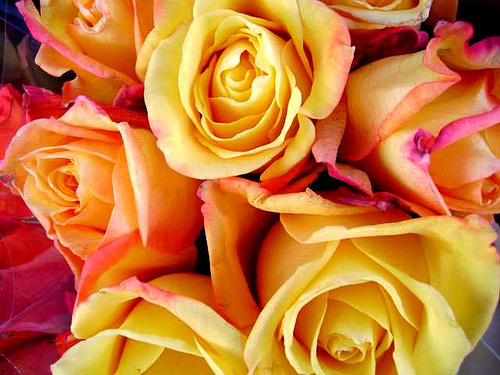

In [6]:
PIL.Image.open(str(roses[0]))

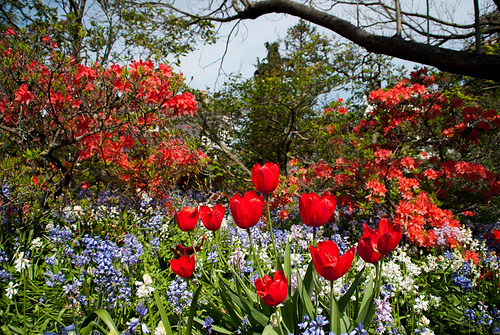

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

#### Read flowers images from disk into numpy array using opencv

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'tulips': 2,
}

In [9]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'),
 PosixPath('datasets/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('datasets/flower_photos/roses/873660804_37f5c6a46e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3554620445_082dd0bec4_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8747396730_966149e6fe_n.jpg')]

In [10]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [12]:
img.shape

(375, 500, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

#### Preparing the Training and Testing Data

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

# split the data into training and testing data, keeping 20% of the data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

# Remove random data points from the training dataset to emulate a situation where limited training data is available
remove_idx = np.random.randint(len(X_train), size=1000)
X_train = np.delete(X_train, remove_idx, axis=0)
y_train = np.delete(y_train, remove_idx, axis=0)

# Normalization of the images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [15]:
X_train.shape, y_train.shape

((809, 180, 180, 3), (809,))

## Example of an Overfit Neural Network Model

In [16]:
# Build a convolutional neural network and train it on the limited data
num_classes = 3

model_1 = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_1.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.3793 - loss: 1.5921
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step - accuracy: 0.5847 - loss: 0.8761
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.6743 - loss: 0.7297
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 297ms/step - accuracy: 0.6852 - loss: 0.7004
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.7455 - loss: 0.5946
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step - accuracy: 0.8475 - loss: 0.4302
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.8722 - loss: 0.3760
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.8836 - loss: 0.2716
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.9334 - loss: 0.2029
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 297ms/step - accuracy: 0.9544 - loss: 0.1318


In [17]:
model_1.save("./saved_models/without_data_augmentation/model.keras")

In [18]:
# evaluating the model on the training dataset
loss, accuracy = model_1.evaluate(X_train_scaled,y_train)
print(f"Accuracy on training data: {accuracy*100}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9900 - loss: 0.0644
Accuracy on training data: 98.3930766582489%


In [19]:
# evaluating the model on the testing dataset
loss, accuracy = model_1.evaluate(X_test_scaled,y_test)
print(f"Accuracy on testing data: {accuracy*100}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5526 - loss: 1.3912
Accuracy on testing data: 54.72061634063721%


**As can be seen from the training and testing accuracies, the model has overfitted the training data and performs poorly on the testing data. Hence, the model is not able to generalize well on new data**

# Improving the Test Accuracy Using Data Augmentation to Produce more Training Data

/home/suyash/personal/data-augmentation-cnn/.venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Text(0.5, 1.0, 'Augmented image:')

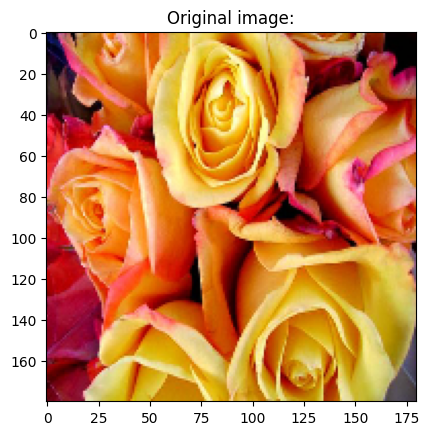

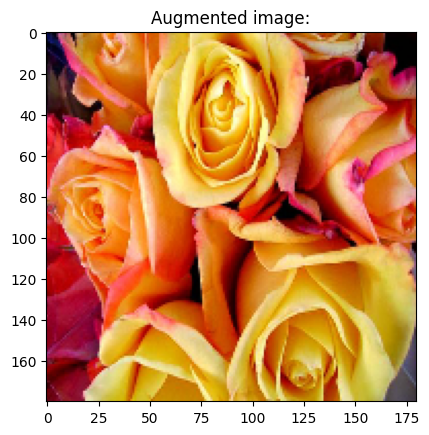

In [20]:
# Testing a RandomFlip layer
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal", input_shape=(180, 180, 3))])

plt.figure(1)
plt.imshow(X[0])
plt.title("Original image:")

plt.figure(2)
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.title("Augmented image:")

Text(0.5, 1.0, 'Augmented image:')

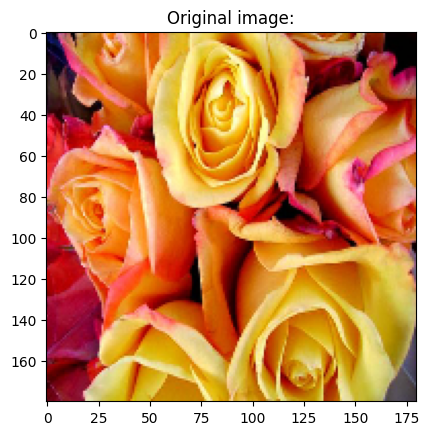

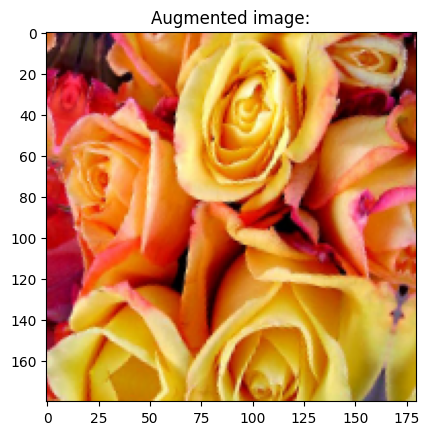

In [21]:
data_augmentation = keras.Sequential(
    [layers.RandomRotation(0.1)])

plt.figure(1)
plt.imshow(X[0])
plt.title("Original image:")

plt.figure(2)
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.title("Augmented image:")

Text(0.5, 1.0, 'Augmented image:')

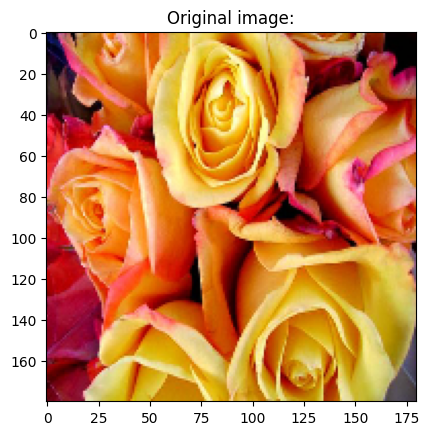

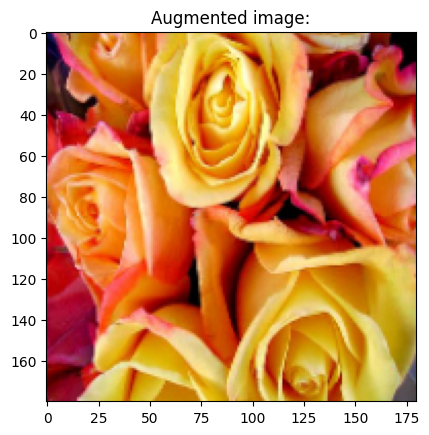

In [22]:
data_augmentation = keras.Sequential(
    [layers.RandomZoom(0.5)])

plt.figure(1)
plt.imshow(X[0])
plt.title("Original image:")

plt.figure(2)
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.title("Augmented image:")

Text(0.5, 1.0, 'Augmented image:')

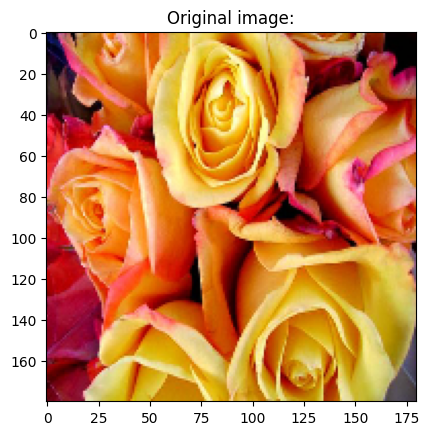

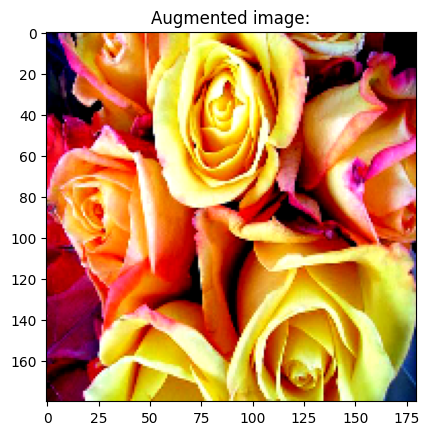

In [23]:
data_augmentation = keras.Sequential(
    [layers.RandomContrast(0.9)])

plt.figure(1)
plt.imshow(X[0])
plt.title("Original image:")

plt.figure(2)
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.title("Augmented image:")

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
   layers.RandomContrast(0.7)
  ]
)

Text(0.5, 1.0, 'Augmented image:')

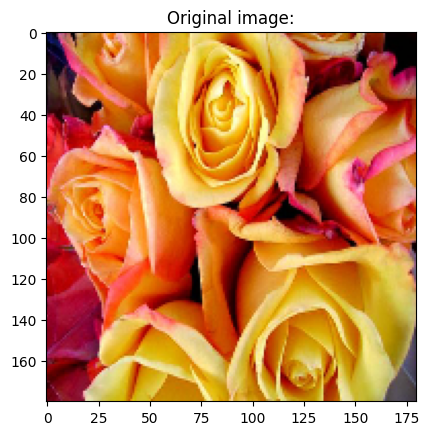

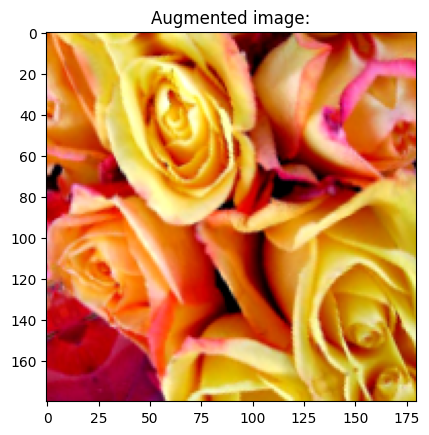

In [25]:
plt.figure(1)
plt.imshow(X[0])
plt.title("Original image:")

plt.figure(2)
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.title("Augmented image:")

In [26]:
def add_augmented_images(X,Y):
  '''Method to create additional data from the original data by applying the data augmentation layer'''
  
  print(f"Elements in original dataset: {len(X)}")
  augmented_images = []
  augmented_lables = []
  
  for i in range(len(X)):
    augmented_images.append(X[i])
    augmented_lables.append(Y[i])

    augmented_images.append(data_augmentation(X)[i].numpy().astype("uint8"))
    augmented_lables.append(Y[i])
  
  print(f"Elements in augmented dataset: {len(augmented_images)}")
  return augmented_images, augmented_lables

In [27]:
# Generate augmented data and add to the dataset
X_train_augmented, Y_train_augmented = add_augmented_images(X_train, y_train)

Elements in original dataset: 809
Elements in augmented dataset: 1618


In [28]:
X_train_augmented = np.array(X_train_augmented)
Y_train_augmented = np.array(Y_train_augmented)

In [29]:
X_train_augmented.shape, Y_train_augmented.shape

((1618, 180, 180, 3), (1618,))

In [30]:
# Normalizing the images
X_train_augmented_scaled = X_train_augmented / 255


**Train the model using data augmentation and a drop out layer**

In [31]:
num_classes = 3

model_2 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_2.fit(X_train_augmented_scaled, Y_train_augmented, epochs=10)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 268ms/step - accuracy: 0.4014 - loss: 1.3845
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.5977 - loss: 0.8748
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.6046 - loss: 0.8388
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.6536 - loss: 0.8030
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.6502 - loss: 0.8052
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 283ms/step - accuracy: 0.6514 - loss: 0.7805
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.6778 - loss: 0.7314
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 275ms/step - accuracy: 0.6645 - loss: 0.7333
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 270ms/step - accuracy: 0.6834 - loss: 0.6976
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.7123 - loss: 0.6509


In [32]:
model_2.save("./saved_models/with_data_augmentation/model.keras")

In [33]:
# evaluating the model on the training dataset
loss, accuracy = model_2.evaluate(X_train_scaled,y_train)
print(f"Accuracy on training data: {accuracy*100}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7302 - loss: 0.5644
Accuracy on training data: 74.04202818870544%


In [34]:
# evaluating the model on the testing dataset
loss, accuracy = model_2.evaluate(X_test_scaled,y_test)
print(f"Accuracy on testing data: {accuracy*100}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6998 - loss: 0.7328
Accuracy on testing data: 68.97880434989929%


## Inference

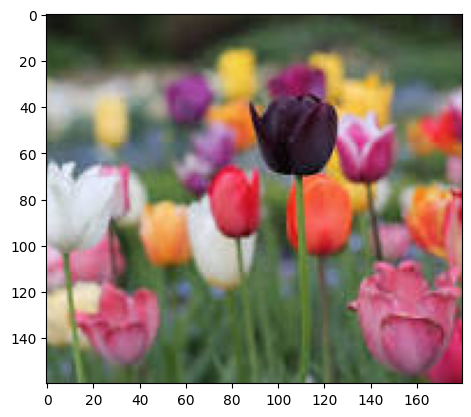

In [46]:
img = cv2.imread("./assets/test.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(img,(180,180))
plt.imshow(img)

test = []
test.append(resized_img)
test = np.array(test)

test_scaled = test/255

In [47]:
model = tf.keras.models.load_model("./saved_models/without_data_augmentation/model.keras")
pred = model.predict(test_scaled)
score = tf.nn.softmax(pred[0])

for key, value in flowers_labels_dict.items():
    if np.argmax(score) == value:
        print(key)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
tulips


In [48]:
model = tf.keras.models.load_model("./saved_models/with_data_augmentation/model.keras")
pred = model.predict(test_scaled)
score = tf.nn.softmax(pred[0])

for key, value in flowers_labels_dict.items():
    if np.argmax(score) == value:
        print(key)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
tulips
